# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


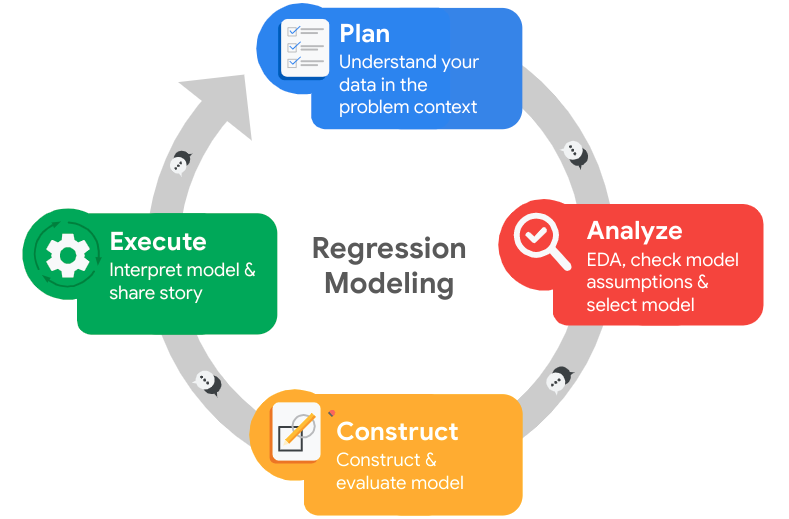

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

### YOUR CODE HERE ### 

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")



# Display first few rows of the dataframe
df0.head()

### YOUR CODE HERE ###


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df0.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
#Employees who stayed
df0[df0["left"]!=1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


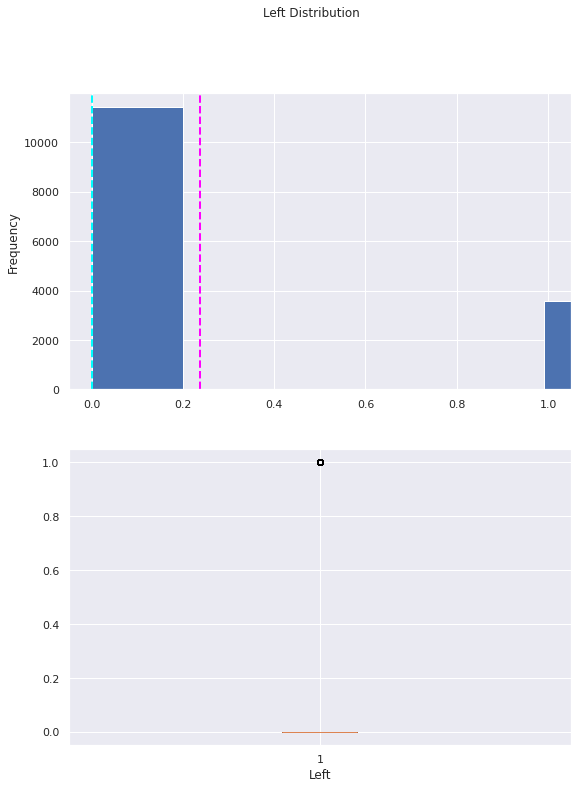

In [5]:
#ax=plt.hist(df0["left"],bins=10)
#ax.axvline(df0["left"].mean(), color='magenta', linestyle='dashed', linewidth=2)
#ax.axvline(df0["left"].median(), color='cyan', linestyle='dashed', linewidth=2)
#plt.show()
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = df0['left']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100, width=0.2)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=True)
ax[1].set_xlabel('Left')

# Add a title to the Figure
fig.suptitle('Left Distribution')

# Show the figure
fig.show()

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [6]:
# Gather basic information about the data

### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df0.shape

(14999, 10)

### Gather descriptive statistics about the data

In [8]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###


In [9]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [10]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={"time_spend_company":"time_spent","Work_accident":"work_accident","promotion_last_5years":"promotion_5yrs","Department":"department"},inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spent', 'work_accident', 'left',
       'promotion_5yrs', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [12]:
# Check for missing values
### YOUR CODE HERE ###

df0.isnull().sum()

satisfaction_level      0
last_evaluation         0
number_project          0
average_montly_hours    0
time_spent              0
work_accident           0
left                    0
promotion_5yrs          0
department              0
salary                  0
dtype: int64

In [13]:
df0.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent,work_accident,left,promotion_5yrs
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spent,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_5yrs,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [14]:
df0["time_spent"].corr(df0["left"])

0.14482217493938582

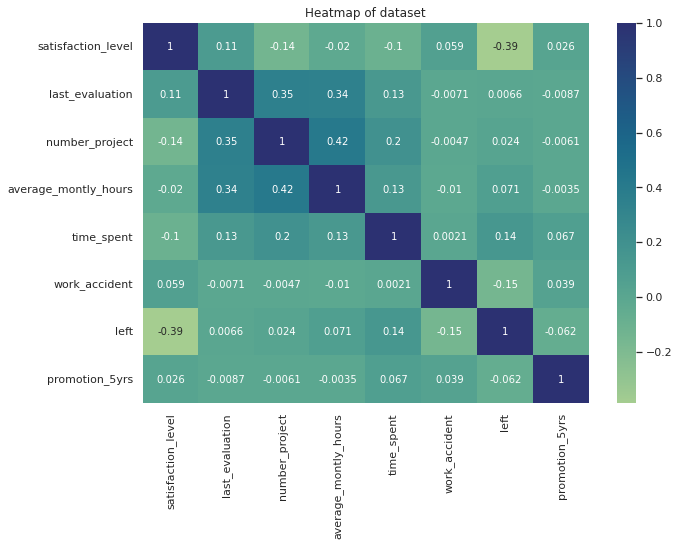

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df0.corr(),cmap="crest",annot=True)
plt.title("Heatmap of dataset")
plt.show()

### Check duplicates

Check for any duplicate entries in the data.

In [16]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [17]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicate=df0[df0.duplicated()]
duplicate

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent,work_accident,left,promotion_5yrs,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [18]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df0.drop_duplicates(inplace=True)
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent,work_accident,left,promotion_5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

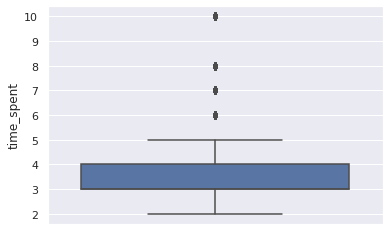

In [19]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(y=df0["time_spent"])
plt.show()

<Figure size 720x504 with 0 Axes>

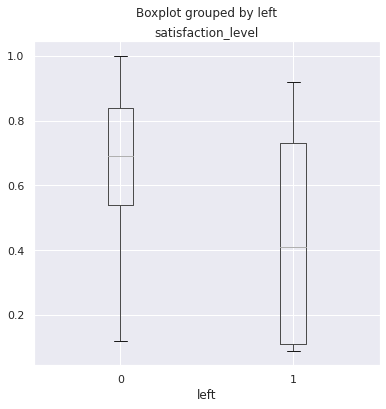

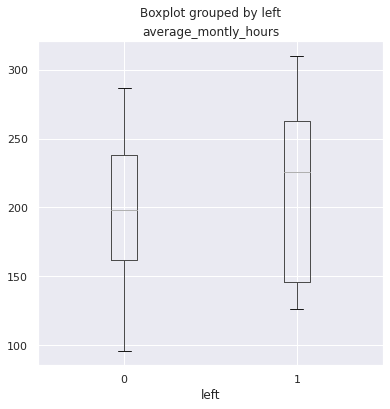

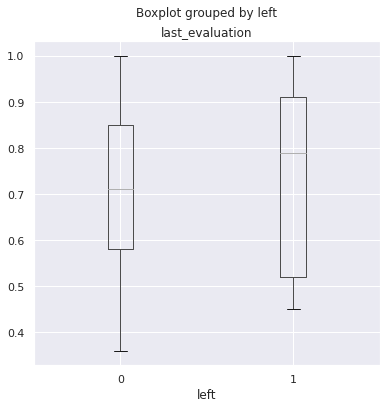

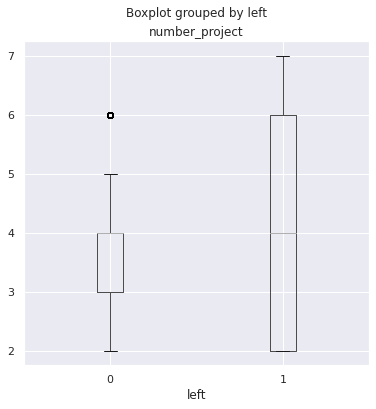

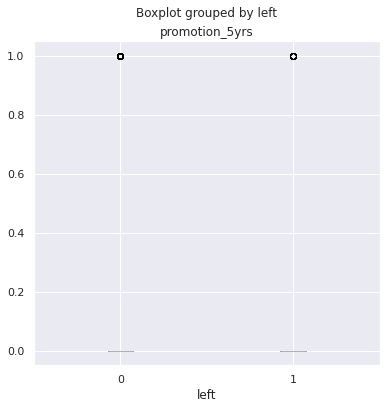

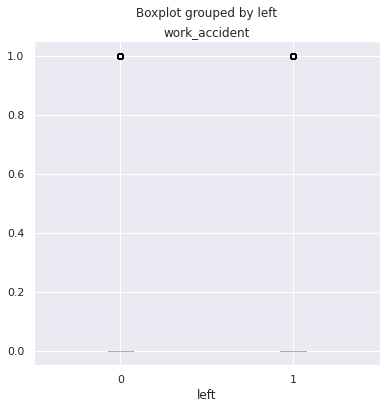

In [20]:
plt.figure(figsize=(10,7))

columns=['satisfaction_level', 'average_montly_hours','last_evaluation',"number_project","promotion_5yrs","work_accident"]

for col in columns:
    df0.boxplot(column=col,by="left",figsize=(6,6))
    plt.title(col)
plt.show()

In [21]:
percentile75=df0["time_spent"].quantile(0.75)
percentile25=df0["time_spent"].quantile(0.25)
iqr=percentile75-percentile25

upper_limit=percentile75+1.5*iqr
lower_limit=percentile75-1.5*iqr


print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers=df0[(df0["time_spent"]>upper_limit)|(df0["time_spent"]<lower_limit)]

print("Number of rows in the data containing outliers in `tenure`:", len(outliers))


Lower limit: 2.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 3734


In [22]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

print(np.where(df0["time_spent"]>5))

(array([    1,    17,    34,    47,    67,    83,    99,   122,   161,
         191,   199,   204,   229,   231,   251,   269,   275,   277,
         282,   315,   327,   351,   352,   397,   399,   410,   415,
         429,   432,   481,   489,   494,   503,   514,   522,   533,
         552,   571,   576,   599,   600,   624,   627,   658,   661,
         666,   676,   717,   748,   799,   801,   832,   837,   846,
         866,   898,   912,   926,   980,  1015,  1037,  1040,  1041,
        1044,  1047,  1077,  1080,  1124,  1131,  1135,  1140,  1191,
        1255,  1277,  1302,  1343,  1346,  1372,  1374,  1376,  1399,
        1447,  1540,  1542,  1547,  1575,  1580,  1643,  1645,  1655,
        1711,  1712,  1714,  1740,  1745,  1751,  1788,  1817,  1826,
        1851,  1891,  1897,  1902,  1932,  1941,  1948,  1959,  1961,
        1972,  2003,  2008,  2015,  2064,  2082,  2086,  2106,  2115,
        2164,  2215,  2236,  2272,  2278,  2297,  2351,  2357,  2371,
        2412,  2420

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [23]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df0["left"].unique()
df0["left"].value_counts()



0    10000
1     1991
Name: left, dtype: int64

In [24]:
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
Left=1991/11991*100
Left



16.604119756484028

In [25]:
Stayed=10000/11991*100
Stayed

83.39588024351598

### Data visualizations

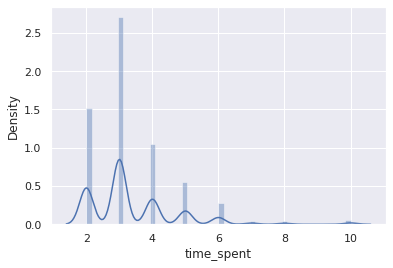

In [26]:
sns.distplot(df0["time_spent"])

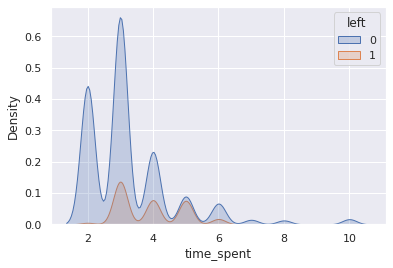

In [27]:
sns.kdeplot(df0["time_spent"],shade=True,hue=df0["left"])

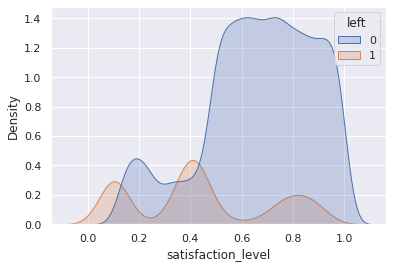

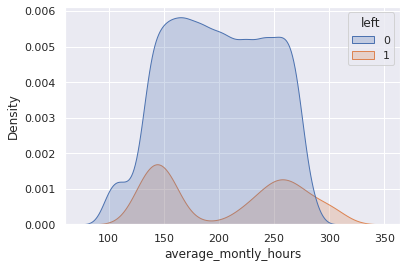

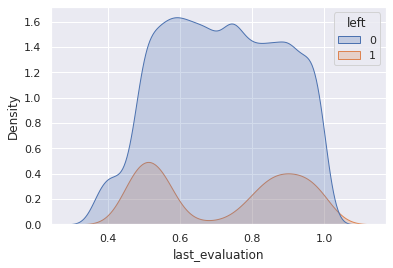

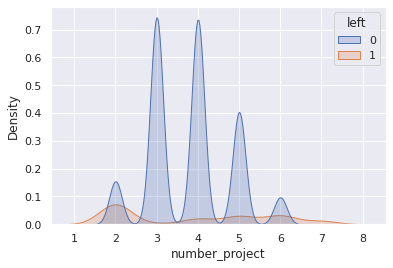

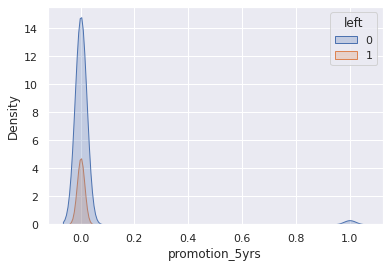

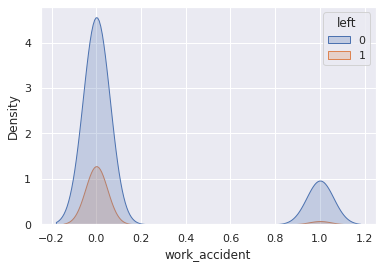

In [28]:
columns=['satisfaction_level', 'average_montly_hours','last_evaluation',"number_project","promotion_5yrs","work_accident"]
for i in columns:
    plt.figure()
    sns.kdeplot(df0[i],shade=True,hue=df0["left"])

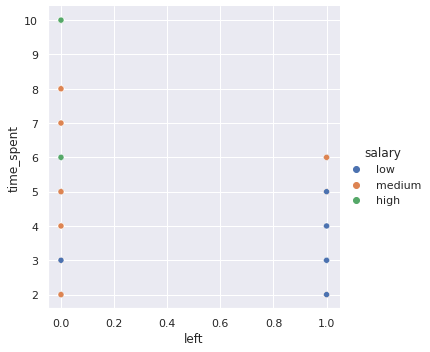

In [29]:
sns.relplot(x="left",y="time_spent",data=df0,hue="salary",kind="scatter")

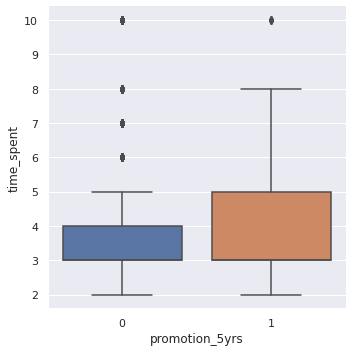

In [30]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.catplot(x="promotion_5yrs",y="time_spent",data=df0,kind="box")

In [31]:
df0.groupby(['department'])['left'].value_counts()

department   left
IT           0        818
             1        158
RandD        0        609
             1         85
accounting   0        512
             1        109
hr           0        488
             1        113
management   0        384
             1         52
marketing    0        561
             1        112
product_mng  0        576
             1        110
sales        0       2689
             1        550
support      0       1509
             1        312
technical    0       1854
             1        390
Name: left, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

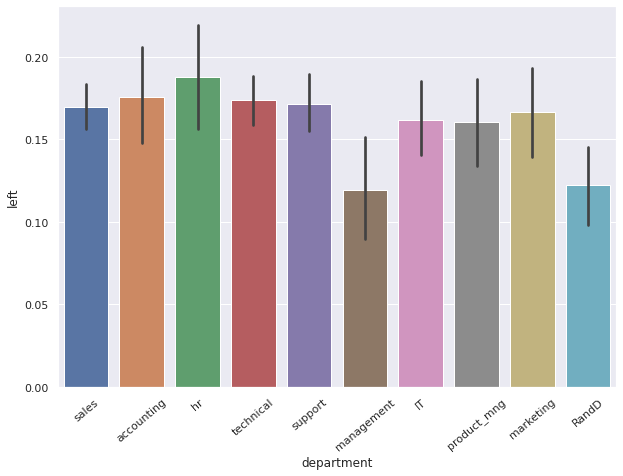

In [32]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x="department",y="left",data=df0)
plt.xticks(rotation=40)

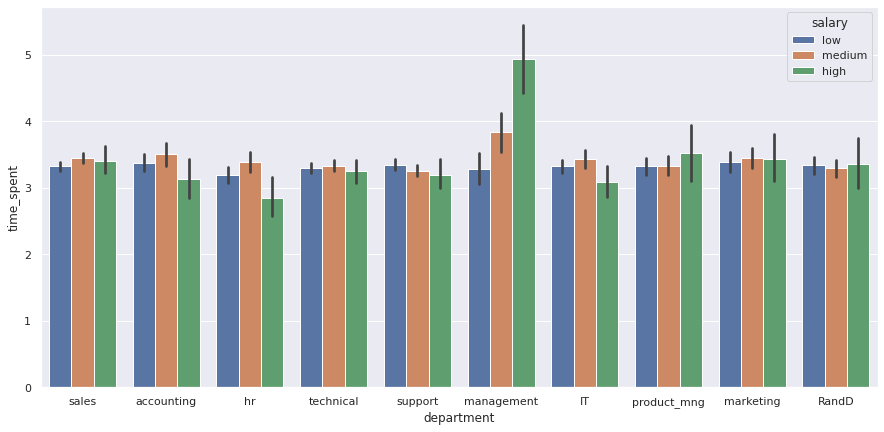

In [33]:
plt.figure(figsize=(15,7))
sns.barplot(x="department",y="time_spent",data=df0,hue="salary",dodge=True)
plt.show()


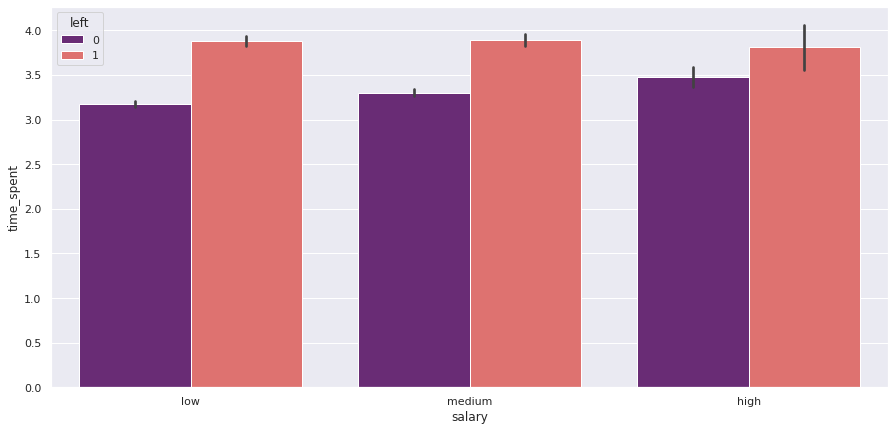

In [34]:
plt.figure(figsize=(15,7))
#sns.relplot(x="time_spent",y="left",data=df0,hue="left",col="salary",kind="line")
sns.barplot(x="salary",y="time_spent",data=df0,hue="left",palette="magma",dodge=True)
plt.show()

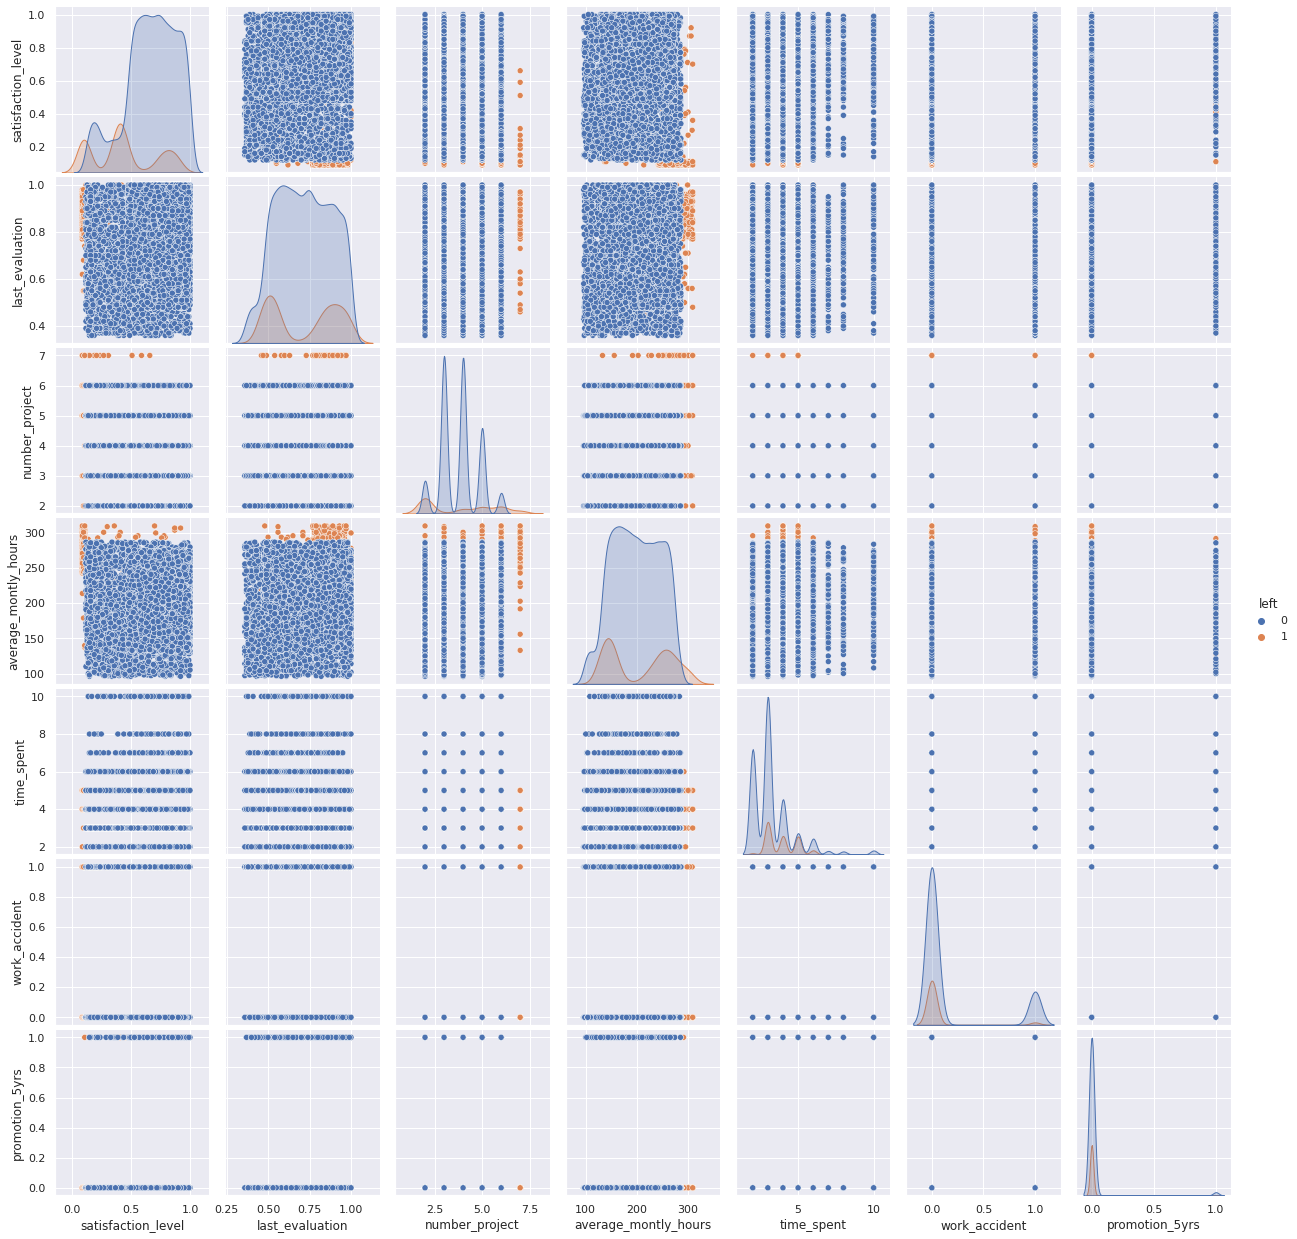

In [35]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df0,hue="left")

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]



The company has poor management team because:

Employees from every single department are working long hours.
Employess who worked the longest hours left the company.
The number of projects employees work on is not evenly distributed. Hence, employees with the most projects left the company.
Very few employees were promoted during the last 5 years.
Overall, satisfaction level amongst employees of every single department is low.
High-paid employees are not that satisfied and low salary employees leave the company at the highest rate.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


# Step 3. Model Building,

In [36]:
# One-hot encoding categorical variables and saving resulting dataframe in a new variable
df_enc = pd.get_dummies(df0, columns = ['salary', 'department'], drop_first=False)

# Displaying new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent,work_accident,left,promotion_5yrs,salary_high,salary_low,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [37]:
df_logreg=df_enc[(df_enc["time_spent"]>upper_limit)|(df_enc["time_spent"]<lower_limit)]
df_logreg

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent,work_accident,left,promotion_5yrs,salary_high,salary_low,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17,0.78,0.99,4,255,6,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
34,0.84,0.87,4,246,6,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
47,0.57,0.70,3,273,6,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
50,0.13,0.78,6,152,2,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
11995,0.90,0.55,3,259,10,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
X=df_logreg[['satisfaction_level', 'average_montly_hours','last_evaluation',"time_spent","number_project","promotion_5yrs","work_accident","salary_high","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]]
y=df_logreg["left"]


In [39]:
y.shape

(3734,)

In [40]:
X.shape

(3734, 19)

In [41]:
from sklearn.model_selection import GridSearchCV,train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 2613
Test cases: 1121


In [42]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
# In addition to the training features and labels, we'll need to set a regularization parameter. 
#This is used to counteract any bias in the sample, and help the model generalize well by avoiding overfitting the model to the training data.
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [43]:
y_pred = model.predict(X_test)
print('Predicted labels: ', y_pred)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 0 0]
Actual labels:     8768     0
7367     0
11623    0
5365     0
7499     0
        ..
9642     0
7259     0
3256     0
5808     0
576      1
Name: left, Length: 1121, dtype: int64


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

# Step 4. Results and Evaluation
 

- Evaluate the model

In [44]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9687778768956289


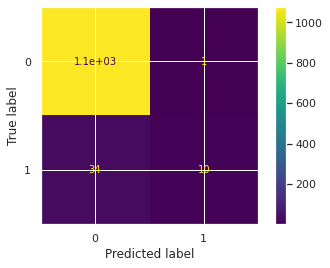

In [45]:
# Computing values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=model.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

#True Negatives (upper-left): The number of employees who did not leave the company that the model accurately predicted did not leave.
#False Positives (upper-right): The number of employees who did not leave. The model inaccurately predicted as leaving.
#False Negatives (bottom-left): The number of employees who left the company that the model innaccurately predicted did not leave.
#True Positives (bottom-right): The number of employees who left. The model accurately predicted as leaving.

In [46]:
df_logreg['left'].value_counts(normalize=True)

0    0.962507
1    0.037493
Name: left, dtype: float64

Insights:

Since this is a binary classification task, the class balance check for the value counts in 'left'.
The data is not perfectly imbalanced, the split is approximately 83% - 17%. However, is not too imbalanced.
If it was more severely imbalanced, I would need to resample to make it more balanced.

# Recall evaluation metrics

AUC is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.


Precision measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.


Recall measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.


Accuracy measures the proportion of data points that are correctly classified.
F1-score is an aggregation of precision and recall.

In [47]:
# # Classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.97      1.00      0.98      1077
    Predicted would leave       0.91      0.23      0.36        44

                 accuracy                           0.97      1121
                macro avg       0.94      0.61      0.67      1121
             weighted avg       0.97      0.97      0.96      1121



The classification report shows that the model achieved:

Precision of 97%. Precision attempts to answer: What proportion of positive identifications was actually correct? Precision is the measure of how many observations our model correctly predicted over the amount of correct and incorrect predictions.


Recall of 100%. Recall attempts to answer: What proportion of actual positives was identified correctly? Recall is the measure of how many observations our model correctly predicted over the total amount of observations.


f1-score of 98%. The F1 score is the harmonic mean of the precision and recall. A good F1 score means that you have low false positives and low false negatives.


Accuracy of 96%. Accuracy measures the number of correct predictions made by a model.

### Identify the types of models most appropriate for this task.

# Tree Based Model ###


In [48]:
df2 = pd.get_dummies(df0)
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent,work_accident,left,promotion_5yrs,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [49]:
X=df2.drop("left",axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent,work_accident,promotion_5yrs,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [50]:
y=df2["left"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [51]:
# Creating test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

In [52]:
tree=DecisionTreeClassifier(random_state=0)
# Assigning a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assigning a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiating GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [53]:
%%time 
tree1.fit(X_tr, y_tr)
# Fitting the decision tree model to the training data, measuring fitting time

CPU times: user 2.5 s, sys: 4.21 ms, total: 2.5 s
Wall time: 2.5 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [54]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [55]:
# Checking best AUC score on Cross Validation (CV)
tree1.best_score_

0.9703634179699269

In [56]:
# Extracting all the scores from the grid search
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Creating dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Getting all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    # Isolating the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extracting Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Creating table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'AUC': auc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

In [57]:
# Getting all Cross Validation (CV) scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.970363,0.922167,0.921337,0.921719,0.974007


# The decision tree model scores are strong indicators of good model performance.
Now, I will construct a random forest model to avoid overfitting by incorporating multiple trees to make predictions.

# Random Forest Classifier

In [58]:
# Instantiating model
rf = RandomForestClassifier(random_state=0)

# Assigning a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assigning a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiating GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [59]:
%%time
rf1.fit(X_tr, y_tr)
# Fitting the random forest model to the training data, measuring fitting time

CPU times: user 7min 53s, sys: 853 ms, total: 7min 54s
Wall time: 7min 54s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [60]:
# Checking best AUC score on CV
rf1.best_score_

0.9795790967836983

In [61]:
# Checking best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [62]:
# Getting all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.970363   0.922167  0.921337  0.921719  0.974007
              Model       AUC  Precision    Recall        F1  Accuracy
0  random forest cv  0.979579   0.943576  0.923021  0.933145  0.978037


In [63]:
# Evaluating these models on the validation set
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
    return table

In [64]:
# Getting the results on validation set for both models
tree1_val_results = get_scores('decision tree1 val', tree1, X_val, y_val)
rf1_val_results = get_scores('random forest1 val', rf1, X_val, y_val)

# Concatenate validation scores into table
all_val_results1 = [tree1_val_results, rf1_val_results]
all_val_results1 = pd.concat(all_val_results1).sort_values(by='AUC', ascending=False)
all_val_results1

,model,AUC,precision,recall,f1,accuracy
0,random forest1 val,0.954,0.955,0.917,0.936,0.979
0,decision tree1 val,0.952,0.924,0.920,0.922,0.974


# Summary of model results¶
The random forest model provides the best results over logistic regression and tree-based models.

# RECOMMENDATIONS
The company needs to:

Find a balance in the number of projects employees are working on.
Inform employees about comapany policies pertaining to paid over time.
Inform employees about promotion policies.
Inform employees about salary increase policies.
Inform employees about policies and benefits based on tenure.
Inform about how the company strives to create a corporate culture that supports employee success and professional development

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.